# PCA + Featue Importance


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



In [10]:
data = pd.read_csv("dados/pos_analyse.csv", encoding="latin1")

In [11]:
data.drop("Unnamed: 0", axis=1, inplace= True)

### PCA


In [12]:
data.columns

Index(['record_date', 'AVERAGE_SPEED_DIFF', 'AVERAGE_FREE_FLOW_SPEED',
       'AVERAGE_TIME_DIFF', 'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY',
       'AVERAGE_TEMPERATURE', 'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY',
       'AVERAGE_WIND_SPEED', 'AVERAGE_CLOUDINESS', 'year', 'month', 'day',
       'hour', 'weekday', 'is_weekend', 'is_holiday', 'season',
       'AVERAGE_SPEED_DIFF_N', 'LUMINOSITY_N', 'AVERAGE_CLOUDINESS_N',
       'is_peak_hour', 'poor_visibility', 'hour_weekday', 'time_ratio'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   record_date              6812 non-null   object 
 1   AVERAGE_SPEED_DIFF       4612 non-null   object 
 2   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 3   AVERAGE_TIME_DIFF        6812 non-null   float64
 4   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 5   LUMINOSITY               6812 non-null   object 
 6   AVERAGE_TEMPERATURE      6812 non-null   float64
 7   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 8   AVERAGE_HUMIDITY         6812 non-null   float64
 9   AVERAGE_WIND_SPEED       6812 non-null   float64
 10  AVERAGE_CLOUDINESS       4130 non-null   object 
 11  year                     6812 non-null   int64  
 12  month                    6812 non-null   int64  
 13  day                      6812 non-null   int64  
 14  hour                    

In [23]:

target = "AVERAGE_SPEED_DIFF_N"
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

num_cols = [c for c in num_cols if c != target]

X = data[num_cols]
y = data[target]

# preencher valores faltantes - mediana
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)


# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



pca = PCA(n_components=3)    
pca_components = pca.fit_transform(X_scaled)




print("Variância explicada pelos 3 componentes:")
print(pca.explained_variance_ratio_)

loadings = pd.DataFrame(
    pca.components_.T,
    index=num_cols,
    columns=["PC1", "PC2", "PC3"]
)

print("\nLoadings (pesos das variáveis nos 3 PCs):")
print(loadings)

print("\nTOP variáveis no PC1:")
print(loadings["PC1"].abs().sort_values(ascending=False).head(5))

print("\nTOP variáveis no PC2:")
print(loadings["PC2"].abs().sort_values(ascending=False).head(5))

print("\nTOP variáveis no PC3:")
print(loadings["PC3"].abs().sort_values(ascending=False).head(5))


Variância explicada pelos 3 componentes:
[0.21748554 0.14840204 0.10294115]

Loadings (pesos das variáveis nos 3 PCs):
                              PC1       PC2           PC3
AVERAGE_FREE_FLOW_SPEED -0.182740 -0.125366 -1.337591e-01
AVERAGE_TIME_DIFF        0.363405 -0.134006  1.173860e-01
AVERAGE_FREE_FLOW_TIME   0.108745  0.075342 -2.545688e-01
AVERAGE_TEMPERATURE      0.269087  0.050907 -2.605135e-01
AVERAGE_ATMOSP_PRESSURE  0.001284  0.075526  1.582374e-01
AVERAGE_HUMIDITY        -0.259692 -0.060208  1.362047e-01
AVERAGE_WIND_SPEED       0.162082  0.003047  6.646229e-02
year                     0.026453  0.011521  6.087580e-01
month                    0.002375 -0.033137 -5.974456e-01
day                     -0.009496 -0.015483  1.297881e-01
hour                     0.175910  0.052510 -3.294046e-02
weekday                  0.003500  0.565337  2.640187e-02
is_weekend              -0.008726  0.528254  1.050465e-02
is_holiday               0.000000 -0.000000 -3.388132e-21
LUMINOSITY_

- PC1: condições de tráfego e ambiente
- PC2: Ritmo temporal/semanal
- PC3: Variação sazonal, a longo prazo

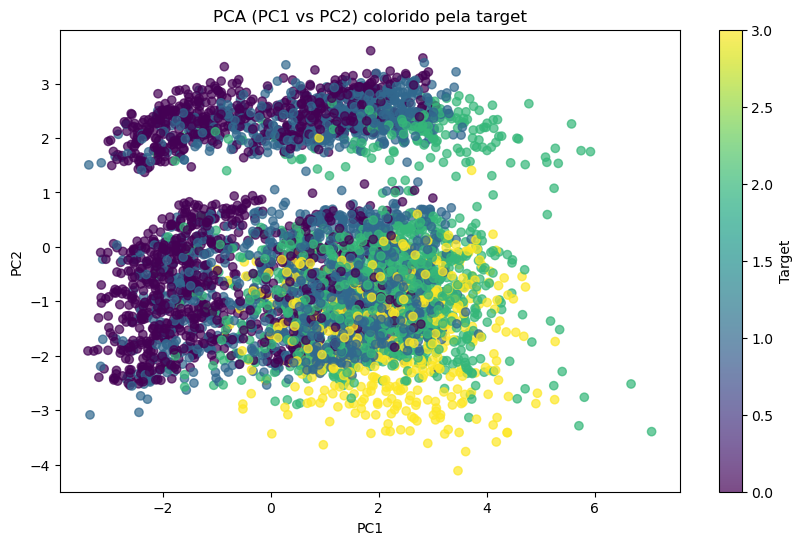

In [22]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    pca_components[:,0], 
    pca_components[:,1], 
    c=y, 
    alpha=0.7
)
plt.colorbar(scatter, label="Target")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (PC1 vs PC2) colorido pela target")
plt.show()

In [25]:
data['AVERAGE_SPEED_DIFF_N'].value_counts()

AVERAGE_SPEED_DIFF_N
1.0    1651
0.0    1419
2.0    1063
3.0     479
Name: count, dtype: int64

In [26]:
data["AVERAGE_SPEED_DIFF"].value_counts()

AVERAGE_SPEED_DIFF
Medium       1651
Low          1419
High         1063
Very_High     479
Name: count, dtype: int64

### Feature Importance

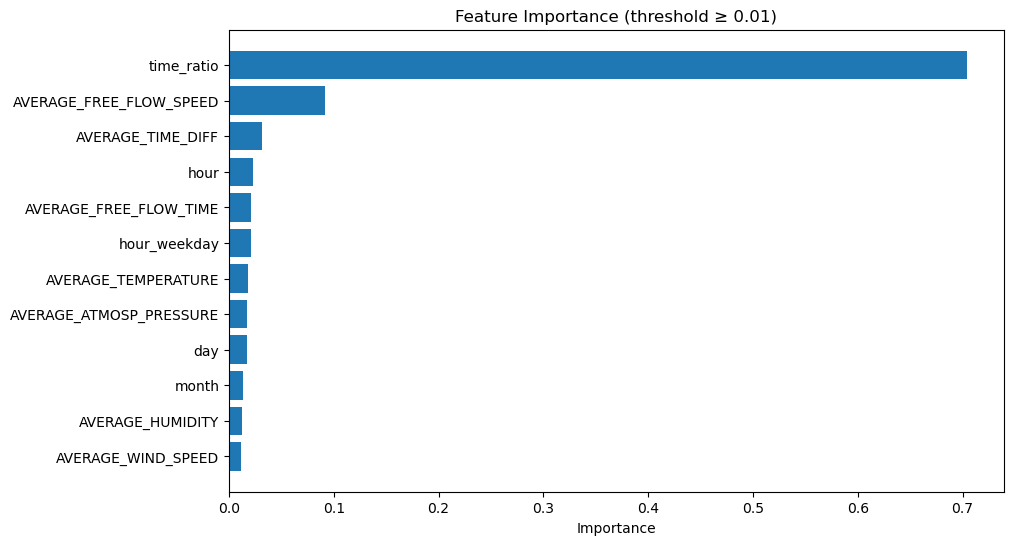

In [33]:

y = data["AVERAGE_SPEED_DIFF_N"]

imputer = SimpleImputer(strategy="median")



X = data.select_dtypes(include=[float, int]).drop(columns=["AVERAGE_SPEED_DIFF_N"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

y_train = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test = imputer.transform(y_test.values.reshape(-1, 1)).ravel()


rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns

fi = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

threshold = 0.01

fi_filtered = fi[fi["importance"] >= threshold]

plt.figure(figsize=(10, 6))
plt.barh(fi_filtered["feature"], fi_filtered["importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title(f"Feature Importance (threshold ≥ {threshold})")
plt.show()
